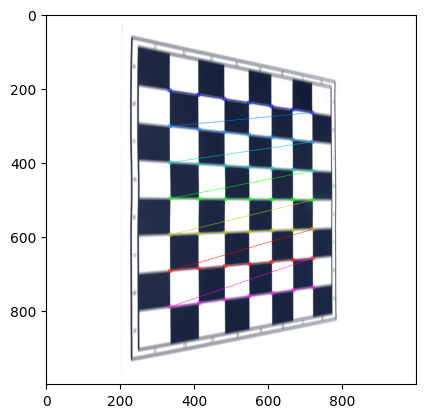

<Figure size 1500x1500 with 0 Axes>

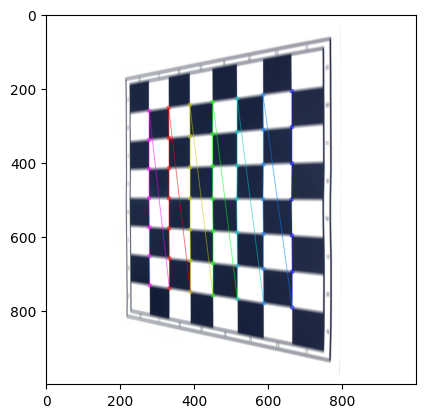

<Figure size 1500x1500 with 0 Axes>

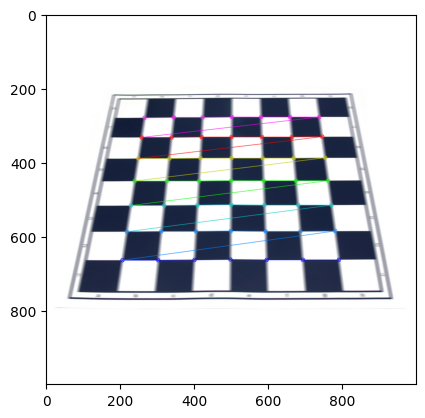

<Figure size 1500x1500 with 0 Axes>

Camera matrix : 

[[1.60194717e+03 0.00000000e+00 5.00426102e+02]
 [0.00000000e+00 1.60267351e+03 5.16034718e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[ 1.09949895e-01 -5.85696368e+00  3.78067331e-03 -4.85345336e-04
   7.11359386e+01]]
rvecs : 

(array([[-0.00396727],
       [-0.72485572],
       [-0.00112961]]), array([[0.58559998],
       [0.548046  ],
       [1.50192946]]), array([[-0.0208382 ],
       [-1.09812519],
       [-2.94069086]]))
tvecs : 

(array([[-1.70006368],
       [-3.18286464],
       [16.41341889]]), array([[ 1.66703874],
       [-3.15555962],
       [16.33242689]]), array([[ 2.97735088],
       [ 1.50518618],
       [16.3744559 ]]))


In [2]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

# Defining the dimensions of checkerboard
CHECKERBOARD = (7,7)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = []


# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

# Extracting path of individual image stored in a given directory
images = glob.glob('./chess/*.jpg')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+
    	cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)

    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display
    them on the images of checker board
    """
    if ret == True:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)

        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2,ret)
    plt.imshow(img)
    plt.figure(figsize=(15,15))
    plt.show()
    cv2.imshow('img',img)
    cv2.waitKey(0)

cv2.destroyAllWindows()

h,w = img.shape[:2]

"""
Performing camera calibration by
passing the value of known 3D points (objpoints)
and corresponding pixel coordinates of the
detected corners (imgpoints)
"""
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

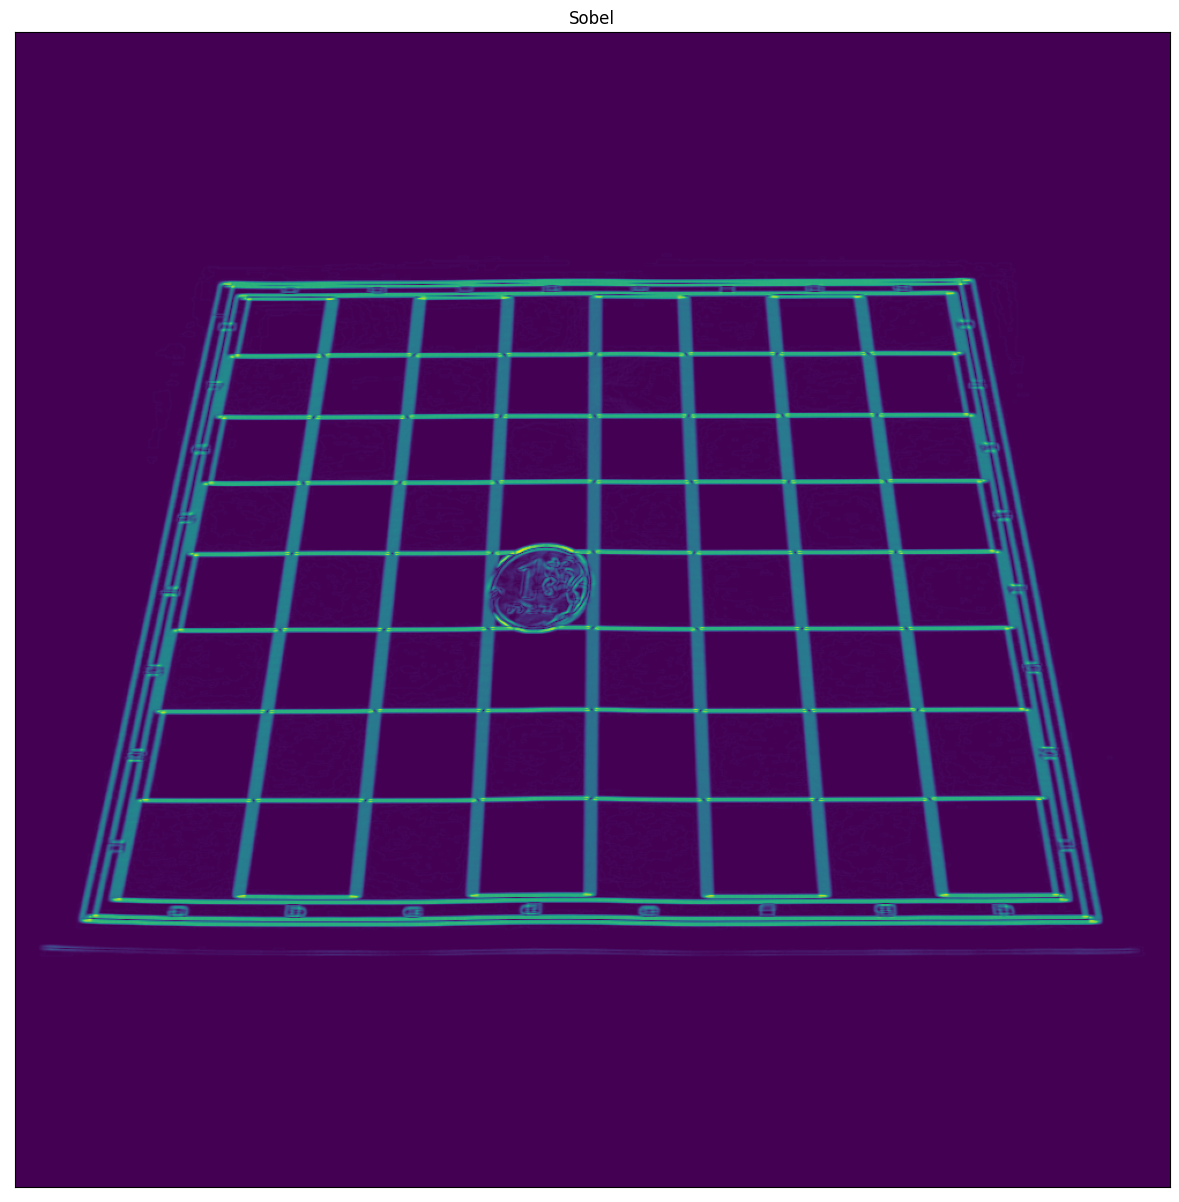

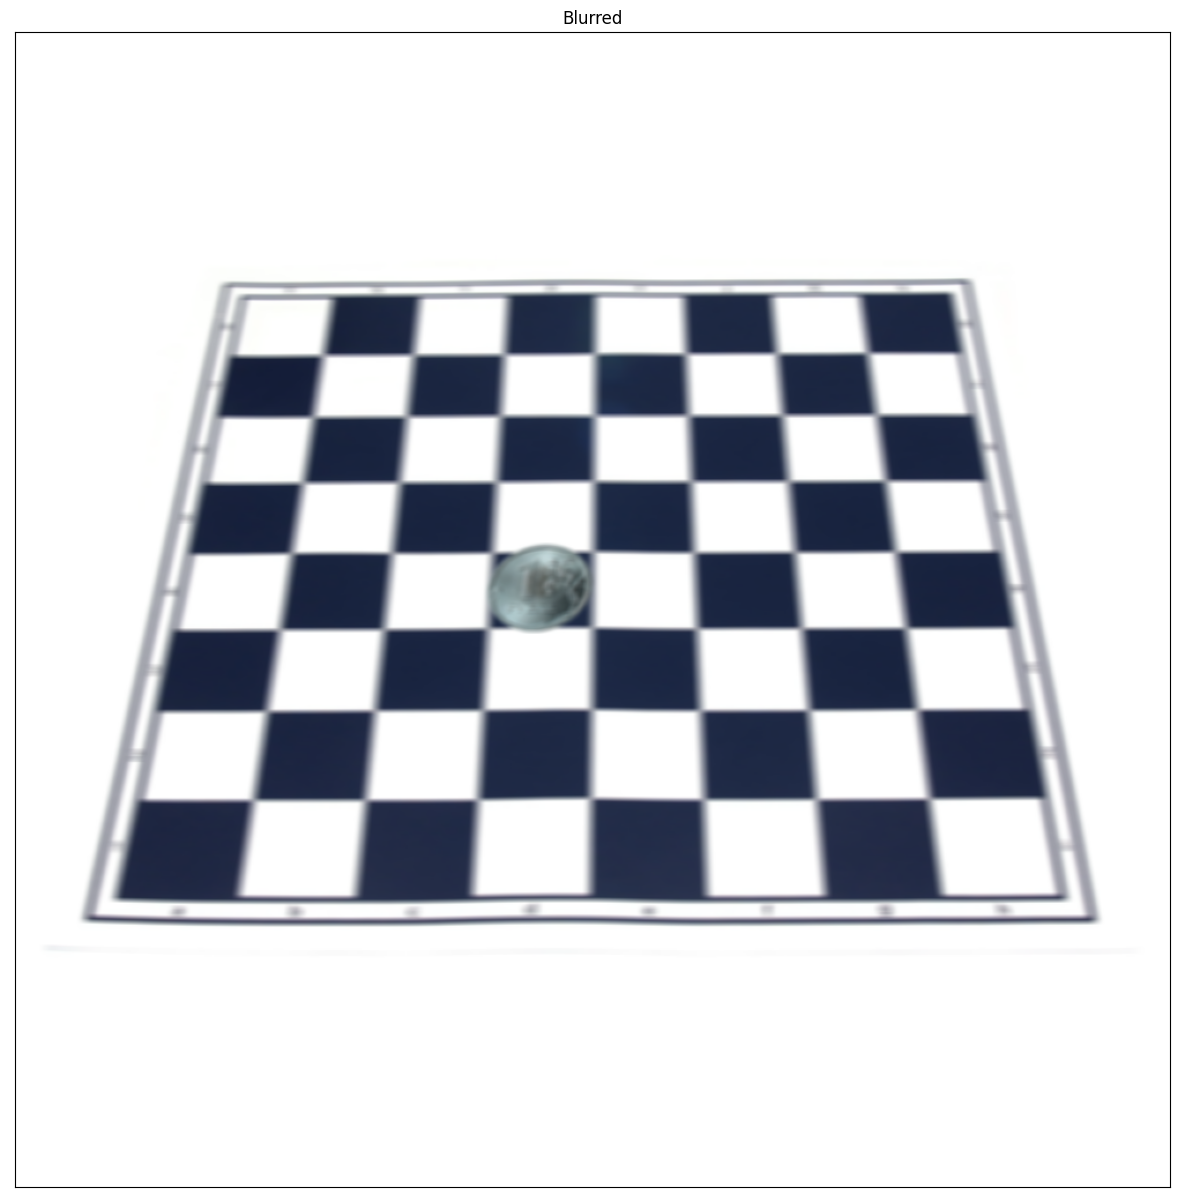

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'dilate'
> Overload resolution failed:
>  - kernel is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'kernel'


In [11]:
import numpy as np
import cv2 as cv
import sys
from matplotlib import pyplot as plt

def sobel():

    window_name = ('Sobel')
    scale = 1
    delta = 0
    ddepth = cv.CV_16S

    # Load the image
    src = cv.imread('chess_coin/coin.jpg', cv.IMREAD_COLOR)
    # Check if image is loaded fine
    src = cv.GaussianBlur(src, (3, 3), 0)
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
    grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)

    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    plt.figure(figsize=(15,15))
    plt.imshow(grad)
    plt.title('Sobel')
    plt.xticks([]), plt.yticks([])
    plt.show()
#     cv.imshow(window_name, grad)
#     cv.waitKey(0)
    return 0

sobel()

img = cv.imread('chess_coin/coin.jpg')
canny = cv.Canny(img, 100, 200)

blur = cv.blur(img,(5,5))
plt.figure(figsize=(15,15))
plt.imshow(blur)
plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()



dilate = cv.dilate(canny, kernel=kernel, iterations=1)
plt.figure(figsize=(15,15))
plt.imshow(dilate, cmap = 'gray')
plt.title('dilate')
plt.show()


erosion = cv2.erode(dilate, kernel=kernel, iterations=1)
plt.figure(figsize=(15,15))
plt.imshow(erosion, cmap = 'gray')
plt.title('erosion')
plt.show()